## Sharktank 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings

In [30]:
df = pd.read_csv('SharkTankCompanies.csv')
df.head(7)

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False
5,True,One of the first entrepreneurs to pitch on Sha...,2,Specialty Food,Susan Knapp,"Napa Valley, CA",http://www.aperfectpear.com,500000,15,3333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,False
6,False,A mixed martial arts clothing line looking to ...,2,Men and Women's Apparel,Craig French,"Hollywood, CA",http://crookedjawfashions.com/,200000,20,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Crooked Jaw,1-2,False


In [3]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

deal                      0
description               0
episode                   0
category                  0
entrepreneurs             0
location                  0
website                   0
askedFor                  0
exchangeForStake          0
valuation                 0
season                    0
shark1                    0
shark2                    0
shark3                    0
shark4                    0
shark5                    0
title                     0
episode-season            0
Multiple Entreprenuers    0
dtype: int64

## Pick out the Deal (Dependent Variable) and Description columns into a separate data frame


In [4]:
data = df[["deal","description"]]
display(data)

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...
...,...,...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...


## Creating two corpora, one with those who secured a Deal, the other with those who did not secure a deal.

In [5]:
data["deal"]=data["deal"].astype("str")
df_true = pd.DataFrame()
df_false = pd.DataFrame()
grouped=data.groupby(data.deal)
grouped.head()
df_true=grouped.get_group("True")
df_false=grouped.get_group("False")

C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_73580\2788962187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["deal"]=data["deal"].astype("str")


In [6]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         387 non-null    object
 1   description  387 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...


In [7]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         387 non-null    object
 1   description  387 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...


In [8]:
df_true.head()

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
5,True,One of the first entrepreneurs to pitch on Sha...
12,True,A line of books written to help children find ...
16,True,Coverplay is a slipcover for children's play y...


In [9]:
df_true.drop(["deal"],axis=1,inplace=True)
df_true

C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_73580\3022033123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true.drop(["deal"],axis=1,inplace=True)


,description
1,Retail and wholesale pie factory with two reta...
2,Ava the Elephant is a godsend for frazzled par...
5,One of the first entrepreneurs to pitch on Sha...
12,A line of books written to help children find ...
16,Coverplay is a slipcover for children's play y...
...,...
489,SynDaver Labs makes synthetic body parts for u...
490,Zoom Interiors is a virtual service for interi...
491,Spikeball started out as a casual outdoors gam...
492,Shark Wheel is out to literally reinvent the w...


### calculating the total number of characters in the "description" column for two dataframes, df_true and df_false.

In [10]:
df_true["chars"]=df_true["description"].str.len()
df_false["chars"]=df_false["description"].str.len()
sum_true=df_true["chars"].sum()
sum_false=df_false["chars"].sum()
print("True Corpus",sum_true)
print("False Corpus",sum_false)

True Corpus 50302
False Corpus 34899


C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_73580\338407882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true["chars"]=df_true["description"].str.len()
C:\Users\MSI_PC\AppData\Local\Temp\ipykernel_73580\338407882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_false["chars"]=df_false["description"].str.len()


In [11]:
df_true=df_true.astype("str")
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  204 non-null    object
 1   chars        204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [12]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(stopwords.words('english'))
print("True: ")
nsw_true=[]
for x in df_true["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    for i in tokens_without_sw:
        nsw_true.append(i)
    print(tokens_without_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

['The', 'Smart', 'Baker', 'known', 'insightfully', 'helpful', 'kitchen', 'tools', '.', 'The', 'company', 'known', 'collapsible', 'cupcake', 'stands', ',', 'display', '100', 'cupcakes', 'stores', 'flat', 'use', '.', 'These', 'cupcake', 'stands', 'also', 'adjustable', ',', 'adapt', 'configuration', 'based', 'many', 'treats', 'plan', 'serve', '.', 'The', 'Smart', 'Baker', 'also', 'brought', 'us', 'pre-cut', 'parchment', 'paper', ',', 'purchase', 'round', 'rectangular', 'shapes', 'according', 'molds', "'ll", 'using', '.', 'These', 'super', 'helpful', 'pre-cut', 'sheets', 'outfitted', 'tabs', 'poke', 'sides', ',', 'use', 'lift', 'cake', 'mold', 'done', '.', 'You', 'might', 'also', 'know', 'The', 'Smart', 'Baker', 'cheat', 'sheet', 'aprons', ',', 'adorned', 'useful', 'measuring', 'conversion', 'tables', '.', 'These', 'aprons', 'save', 'stains', ',', 'spills', ',', 'measuring', 'mistakes', '.']
['Kisstixx', 'fun', 'lip', 'balm', 'comes', 'pairs', 'according', 'compatible', 'flavors', '.', 'Ea

['Shell', 'Bobbers', ':', 'fishing', 'bobbers', 'made', 'used', 'shotgun', 'shells', '.', 'If', 'hunting', 'fishing', 'enthusiast', 'life', ',', 'rest', 'assured', 'appreciate', 'idea', 'moment', 'see', '.', 'These', 'Shell', 'Bobbers', 'novelty', 'item', ',', 'fully-functional', 'bobbers', 'float', 'upright', ',', 'well', 'water', 'line', ',', 'remain', 'visible', 'easy', 'spot', '.', 'Use', 'Shell', 'Bobbers', 'fishing', 'situation', 'enjoy', 'fact', "'re", 'giving', 'second', 'life', 'scrap', 'shot', 'gun', 'shells', 'would', 'otherwise', 'cluttering', 'landfill', '.']
['Individually', 'packaged', 'cupcake-in-a-jar', ',', 'sold', 'retail', 'shipping', 'nationwide', '.']
['A', 'subscription', 'service', 'delivering', 'assortment', 'coffees', 'at-home', 'brewing', '.']
['A', 'fully-seasoned', 'gumbo', 'base', 'form', 'brick', '.']
['Spacious', 'photobooths', 'filled', 'props', '.']
['A', 'balance', 'bike', 'kids', 'work', 'riding', 'two-wheeled', 'bicycles', '.', 'Rather', 'using', 't

['Origami', 'meets', 'home', 'storage', '.', 'A', 'collapsible', 'storage', 'box', 'designed', 'ease', 'use', '.', 'BZBox', 'pops', 'open', 'one', 'movement', ',', 'collapses', 'flat', 'easily', '.', 'BZBox', 'sturdier', 'versatile', 'typical', 'cardboard', 'box', '.']
['A', 'free', 'iPad', 'app', 'effortlessly', 'measures', 'child', "'s", 'feet', ',', 'connects', 'online', 'store', 'easily', 'find', 'shoes', 'fit', '.']
['A', 'sling', 'dog', 'carrier', 'tote', 'hybrid', ',', 'HeartPUP', 'allows', 'user', 'carry', 'pets', 'handsfree', 'comfortably', 'making', 'fashion', 'statement', '.']
['Reviver', 'Clothing', 'Swipes', 'like', 'deodorant', 'clothes', '.', 'These', 'reusable', 'environmentally-friendly', 'swipes', 'keep', 'clothes', 'smelling', 'fresh', 'washes', '.', 'Made', 'USA', ',', 'Reviver', 'swipes', 'perfect', 'solution', 'favorite', 'pieces', 'ca', "n't", 'tear', 'away', '.', 'By', 'potentially', 'prolonging', 'time', 'washes', ',', 'Reviver', 'also', 'encourage', 'efficient

['Boobypack', 'sports', 'bra/crop-top', 'zipper-enclosed', ',', 'water-resistant', 'pockets', 'either', 'side', '.', 'This', 'fannypack', 'rack', 'keeps', 'valuables', 'safe', 'dance', ',', 'jog', 'fist', 'pump', 'ease', '.']
['Scholly', 'mobile', 'web', 'app', 'gives', 'high', 'school', 'students', ',', 'current', 'college', 'students', ',', 'graduate', 'students', 'fast', 'simple', 'way', 'find', 'scholarships', 'pay', 'college', '.']
['LuminAID', 'solar-powered', 'inflatable', 'light', 'developed', 'two', 'architecture', 'students', '2010', 'Haiti', 'Earthquake', '.']
['Frill', 'Clothing', 'designs', 'sorority', 'recruitment', 'clothing', 'donates', 'portion', 'sorority', "'s", 'proceeds', 'charity', 'choice', '.']
['Coco', 'Jack', 'tool', 'safely', 'easily', 'open', 'young', 'Thai', 'coconuts', ',', 'matter', 'size', 'strength', '.', 'The', 'company', 'offers', 'whole', 'suite', 'tools', 'make', 'young', 'Thai', 'coconuts', 'accessible', 'consumers', '.']
['EmazingLights', 'pioneer

In [13]:
nsw_false=[]
print("False:")
tokens_without_sw_freq=[]
for x in df_false["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    print(tokens_without_sw)
    for i in tokens_without_sw:
        nsw_false.append(i)
    print(tokens_without_sw)

False:
['Organizing', ',', 'packing', ',', 'moving', 'services', 'delivered', 'college', 'women', '.']
['Organizing', ',', 'packing', ',', 'moving', 'services', 'delivered', 'college', 'women', '.']
['Interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information', '.']
['Interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information', '.']
['A', 'mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', '/', 'streetwear', 'apparel', '.']
['A', 'mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', '/', 'streetwear', 'apparel', '.']
['Attach', 'Noted', 'detachable', '``', 'arm', "''", 'holds', 'Post-It', 'notes', 'side', 'laptop', 'screen', '.']
['Attach', 'Noted', 'detachable', '``', 'arm', "''", 'holds', 'Post-It', 'notes', 'sid

['Pure', 'Ayre', 'Odor', 'Eliminator', 'anyone', 'owns', 'pets', 'ever', 'faced', 'lingering', 'smells', '.', 'What', 'makes', 'Pure', 'Ayre', 'different', 'smell-neutralizing', 'sprays', 'uses', 'natural', 'enzymes', 'break', 'smelly', 'compounds', '.', 'Pure', 'Ayre', 'banishes', 'bad', 'odors', 'without', 'harsh', 'chemicals', ',', 'alcohol', ',', 'bacteria', ',', 'citrus', '.', 'It', "'s", 'effective', 'even', 'offensive', 'smells', ',', 'example', 'vomit', ',', 'skunk', 'spray', ',', 'kennel', 'odors', '.', 'Once', 'buy', 'first', '14', 'oz', '.', '22', 'oz', '.', 'spray', 'bottle', 'Pure', 'Aure', 'Odor', 'Eliminator', ',', 'buy', 'gallon', 'continue', 'reuse', 'bottle', '.']
['Pure', 'Ayre', 'Odor', 'Eliminator', 'anyone', 'owns', 'pets', 'ever', 'faced', 'lingering', 'smells', '.', 'What', 'makes', 'Pure', 'Ayre', 'different', 'smell-neutralizing', 'sprays', 'uses', 'natural', 'enzymes', 'break', 'smelly', 'compounds', '.', 'Pure', 'Ayre', 'banishes', 'bad', 'odors', 'without',

['eCreamery', 'makes', 'small-batch', 'ice', 'cream', ',', 'gelato', ',', 'sorbet', 'classic', 'experimental', 'flavors', 'alike', '.', 'Aside', 'brick-and-mortar', 'location', 'Omaha', ',', 'also', 'strong', 'online', 'presence', ',', 'ship', 'pint', 'flavor', 'directly', 'door', '.', 'With', 'eCreamery', ',', 'customer', 'wields', 'scoop', ',', 'speak', '.', 'You', 'customize', 'order', 'even', 'create', 'flavor', 'outright', '.', 'eCreamery', 'hand-pack', 'frozen', 'treat', 'pints', 'even', 'batches', 'single-serve', 'cups', ',', 'personalized', 'labels', 'choosing', '.']
['eCreamery', 'makes', 'small-batch', 'ice', 'cream', ',', 'gelato', ',', 'sorbet', 'classic', 'experimental', 'flavors', 'alike', '.', 'Aside', 'brick-and-mortar', 'location', 'Omaha', ',', 'also', 'strong', 'online', 'presence', ',', 'ship', 'pint', 'flavor', 'directly', 'door', '.', 'With', 'eCreamery', ',', 'customer', 'wields', 'scoop', ',', 'speak', '.', 'You', 'customize', 'order', 'even', 'create', 'flavor'

['Traditional', 'Fisheries', 'commercial', 'supplier', 'lionfish', '.', 'The', 'company', "'s", 'system', 'harvesting', 'lionfish', 'yields', 'ample', 'supply', 'reduces', 'lionfish', 'population', ',', 'added', 'benefit', 'invasive', 'species', 'crowing', 'varieties', 'fish', 'many', 'areas', '.', 'Lionfish', 'currently', 'risk', 'over-fishing', ';', 'completely', 'contrary', ',', 'actually', '.', 'For', 'reason', ',', "'s", 'fantastic', 'choice', 'seafood', 'seeking', 'consume', 'fish', 'sustainable', '.', 'Every', 'lionfish', 'eat', 'saves', 'number', 'endangered', 'fish', 'harvested', 'and/or', 'crowded', 'natural', 'habitat', '.']
['Traditional', 'Fisheries', 'commercial', 'supplier', 'lionfish', '.', 'The', 'company', "'s", 'system', 'harvesting', 'lionfish', 'yields', 'ample', 'supply', 'reduces', 'lionfish', 'population', ',', 'added', 'benefit', 'invasive', 'species', 'crowing', 'varieties', 'fish', 'many', 'areas', '.', 'Lionfish', 'currently', 'risk', 'over-fishing', ';', 'c

['With', 'Define', 'Bottle', ',', 'make', 'fruit-infused', 'water', 'take', 'on-the-go', '.', 'The', 'striking', 'eco-friendly', 'design', 'makes', 'fashion', 'statement', 'allowing', 'desired', 'combination', 'fresh', 'fruit', ',', 'teas', 'herbal', 'infusions', '.', 'A', 'great', 'way', 'sidestep', 'tempting', 'sugary', 'drinks', 'like', 'sodas', ',', 'Define', 'Bottle', 'available', 'several', 'sizes', 'ranging', 'ultra-portable', '7-oz', 'model', 'full-sized', '17', 'oz', '.', 'bottle', '.']
['With', 'Define', 'Bottle', ',', 'make', 'fruit-infused', 'water', 'take', 'on-the-go', '.', 'The', 'striking', 'eco-friendly', 'design', 'makes', 'fashion', 'statement', 'allowing', 'desired', 'combination', 'fresh', 'fruit', ',', 'teas', 'herbal', 'infusions', '.', 'A', 'great', 'way', 'sidestep', 'tempting', 'sugary', 'drinks', 'like', 'sodas', ',', 'Define', 'Bottle', 'available', 'several', 'sizes', 'ranging', 'ultra-portable', '7-oz', 'model', 'full-sized', '17', 'oz', '.', 'bottle', '.'

['Storm', 'Stoppers', 'DIY', 'storm', 'window', 'protection', '.', 'Lightweight', ',', 'safe', 'simple', 'install', ',', 'Storm', 'Stoppers', 'go', 'without', 'bolts', 'screws', ',', 'cut', 'installed', 'without', 'use', 'power', 'tools', '.', 'Among', 'benefits', ',', 'Storm', 'Stoppers', 'take', 'minute', 're-install', 'per', 'window', ',', "n't", 'bolt', ',', "'re", 'also', 'easiest', 'remove', 'case', 'needed', 'make', 'safe', 'exit', 'one', 'openings', '.']
['Storm', 'Stoppers', 'DIY', 'storm', 'window', 'protection', '.', 'Lightweight', ',', 'safe', 'simple', 'install', ',', 'Storm', 'Stoppers', 'go', 'without', 'bolts', 'screws', ',', 'cut', 'installed', 'without', 'use', 'power', 'tools', '.', 'Among', 'benefits', ',', 'Storm', 'Stoppers', 'take', 'minute', 're-install', 'per', 'window', ',', "n't", 'bolt', ',', "'re", 'also', 'easiest', 'remove', 'case', 'needed', 'make', 'safe', 'exit', 'one', 'openings', '.']
['Off', 'Cob', 'makes', 'premium-quality', 'tortilla', 'chips', 'u

['Budsies', 'magically', 'transforms', 'artwork', 'fully', 'custom', 'stuffed', 'animal', '.']
['Budsies', 'magically', 'transforms', 'artwork', 'fully', 'custom', 'stuffed', 'animal', '.']
['Bee', 'Thinking', 'crafts', 'beautiful', 'bee', 'hives', 'Portland', ',', 'Oregon', ',', 'beekeepers', 'throughout', 'world', '.']
['Bee', 'Thinking', 'crafts', 'beautiful', 'bee', 'hives', 'Portland', ',', 'Oregon', ',', 'beekeepers', 'throughout', 'world', '.']
['Lightweight', 'yet', 'supportive', 'extremely', 'comfortable', 'athletic', 'shoes', '.']
['Lightweight', 'yet', 'supportive', 'extremely', 'comfortable', 'athletic', 'shoes', '.']
['A', 'technology', 'platform', 'allowing', 'content', 'creators', 'insert', 'additional', 'information', 'directly', 'word', 'phrase', 'digital', 'document', '.']
['A', 'technology', 'platform', 'allowing', 'content', 'creators', 'insert', 'additional', 'information', 'directly', 'word', 'phrase', 'digital', 'document', '.']
['A', 'simple', 'bar', 'stool', 't

In [14]:
freq = nltk.FreqDist(nsw_false)
freq_false=freq.most_common(3)
print(freq_false)
freq = nltk.FreqDist(nsw_true)
freq_true=freq.most_common(3)
print(freq_true)

[('.', 326), (',', 268), ('A', 55)]
[('.', 470), (',', 443), ("'s", 69)]


In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### word cloud Secured a deal

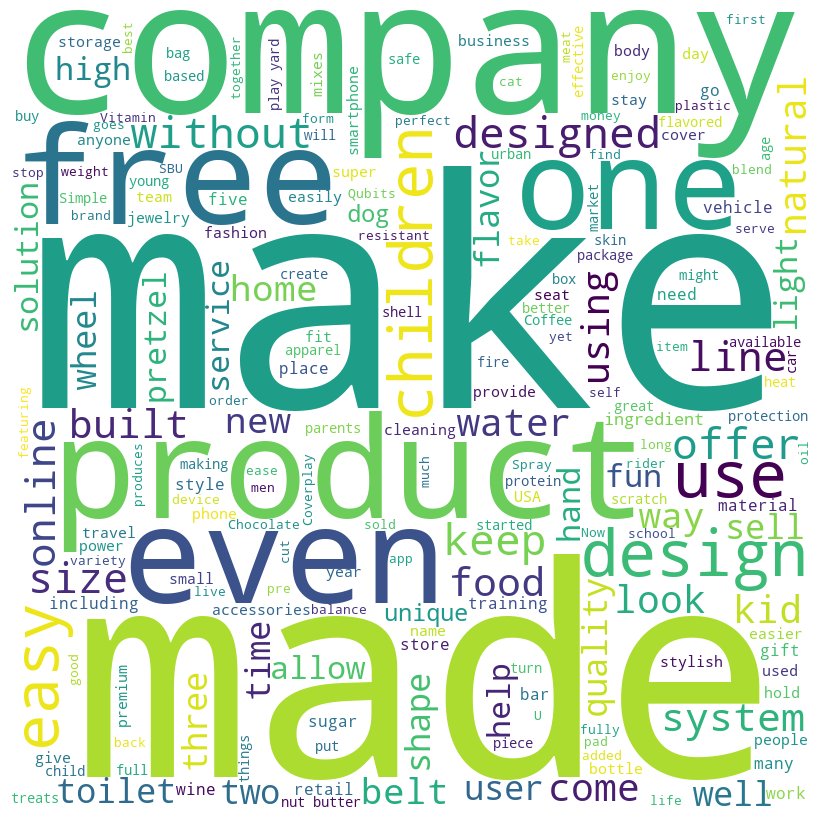

In [17]:
# Combine words from the "description" column of df_true into a single string
comment_words_true = ' '.join(df_true['description'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(comment_words_true)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### word cloud Did not secure a deal

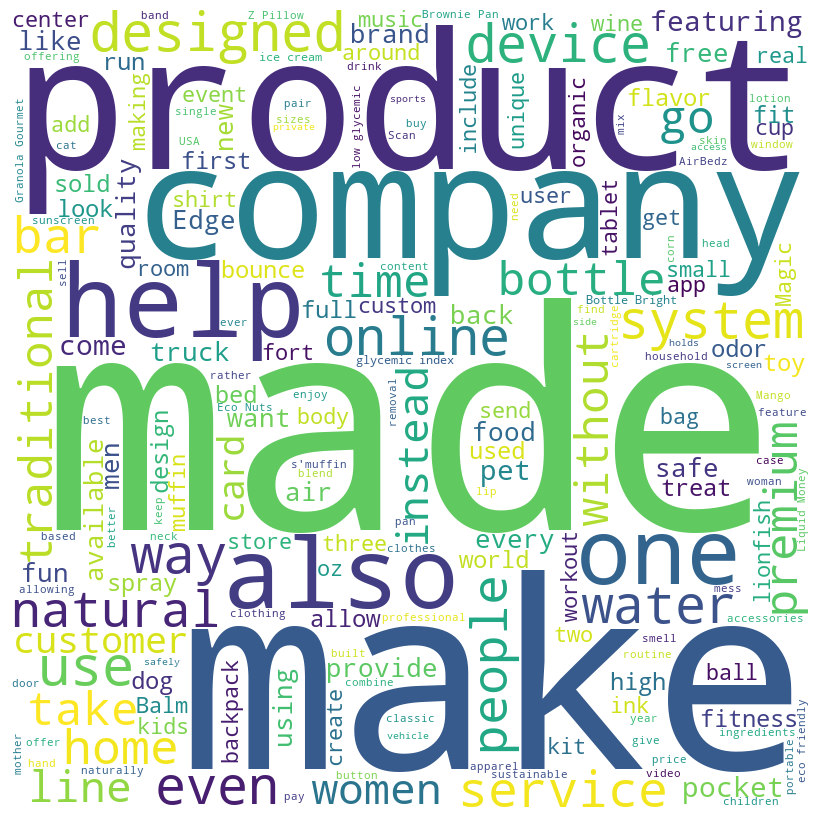

In [18]:
comment_words_false = ' '.join(df_false['description'])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_false)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Q4: Refer to both the word clouds. What do you infer?

The 'secured a deal' wordcloud contains words such as 'one', 'design' , 'free' ,'children' ,'offer', 'easy' ,'online','use' .These indicate that Deals aimed towards catering to the children, which provided offers or a free sample/product, was easy to use, had a good design and was unique in its creativity are more likely to secure a deal.

The 'Did not secure a deal' wordcloud contains words such as 'one', 'designed' , 'help' ,'device' ,'bottle', 'premium' ,'use' .These indicate that Deals with a mediocre design, less suited to solve/help a problem, products involving water bottles, having a higher and premium price tag and less usability are less likely to secure a deal.

It is also observed that words such as 'one', 'designed' ,'system' and 'use' have a higher weight in both these wordclouds.This indicates that either these were not the defining factors to whether a deal is made or not or might have been used in a different context in the description in each scenario.

### Q5.Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less likely to secure a deal based on your analysis?

The word 'device' is not easily found in the 'secured a deal' wordcloud while it is easily spotted in tne 'not secured a deal' wordcloud. This indicates that the word 'device' occured frequently when a deal was rejected hence implying the statement given in the question is true.

# Part 2 Predictive Modelling 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
df.deal.value_counts()

True     204
False    183
Name: deal, dtype: int64

## Feature Engineering 

In [31]:
from collections import Counter

# Combine words from the "description" column of df_true and df_false
all_words_true = ' '.join(df_true['description'])
all_words_false = ' '.join(df_false['description'])

# Tokenize and count the frequency of words in both categories
word_freq_true = Counter(all_words_true.split())
word_freq_false = Counter(all_words_false.split())

# Function to calculate word frequency based on the deal status
def calculate_word_freq(description, deal_status):
    if deal_status:
        return sum([word_freq_true[word] for word in description.split()])
    else:
        return sum([word_freq_false[word] for word in description.split()])

# Add new columns to the original DataFrame
df['word_freq_true'] = df.apply(lambda row: calculate_word_freq(row['description'], row['deal']), axis=1)
df['word_freq_false'] = df.apply(lambda row: calculate_word_freq(row['description'], not row['deal']), axis=1)

# Display the updated DataFrame
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,...,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers,word_freq_true,word_freq_false
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False,132,196
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False,549,359
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False,2041,1518
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False,249,382
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,...,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False,305,471


In [32]:
# Drop the specified columns
columns_to_drop = ["description", "episode", "category", "entrepreneurs", "location", "website", "title","episode-season","season"]
df.drop(columns=columns_to_drop, inplace=True, axis=1)

# Display the updated DataFrame
print(df.head())


    deal  askedFor  exchangeForStake  valuation            shark1  \
0  False   1000000                15    6666667  Barbara Corcoran   
1   True    460000                10    4600000  Barbara Corcoran   
2   True     50000                15     333333  Barbara Corcoran   
3  False    250000                25    1000000  Barbara Corcoran   
4  False   1200000                10   12000000  Barbara Corcoran   

            shark2         shark3        shark4            shark5  \
0  Robert Herjavec  Kevin O'Leary  Daymond John  Kevin Harrington   
1  Robert Herjavec  Kevin O'Leary  Daymond John  Kevin Harrington   
2  Robert Herjavec  Kevin O'Leary  Daymond John  Kevin Harrington   
3  Robert Herjavec  Kevin O'Leary  Daymond John  Kevin Harrington   
4  Robert Herjavec  Kevin O'Leary  Daymond John  Kevin Harrington   

   Multiple Entreprenuers  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  


In [33]:
df.isnull().any()

deal                      False
askedFor                  False
exchangeForStake          False
valuation                 False
shark1                    False
shark2                    False
shark3                    False
shark4                    False
shark5                    False
Multiple Entreprenuers    False
dtype: bool

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define categorical columns
categorical_cols = ["shark1", "shark2", "shark3", "shark4", "shark5"]

# Define transformations
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ],
    remainder="passthrough"
)

# Apply transformations
X_encoded = preprocessor.fit_transform(df)

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Convert boolean columns to numeric
df["deal"] = df["deal"].astype(int)
df["Multiple Entreprenuers"] = df["Multiple Entreprenuers"].astype(int)

# Define X and y
X = X_scaled
y = df["deal"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# Models and Evaluation
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Naïve Bayes Model", GaussianNB()),
    ("KNN Model", KNeighborsClassifier()),
    ("Random Forest Model", RandomForestClassifier()),
    ("Gradient Boosting Model", GradientBoostingClassifier())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{name} Performance:")
    print(classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_pred))
    print("------")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        68

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

AUC: 1.0
------
Linear Discriminant Analysis Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        68

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

AUC: 1.0
------
Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        68

    accuracy                         

C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        68

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

AUC: 1.0
------
Gradient Boosting Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        68

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

AUC: 1.0
------


In [36]:
for name, model in models:
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    
    print(f"{name} Accuracy:", accuracy)
    print("------")


Logistic Regression Accuracy: 1.0
------
Linear Discriminant Analysis Accuracy: 1.0
------
Decision Tree Classifier Accuracy: 1.0
------
Naïve Bayes Model Accuracy: 0.9932885906040269
------
KNN Model Accuracy: 0.9664429530201343
------
Random Forest Model Accuracy: 1.0
------
Gradient Boosting Model Accuracy: 1.0
------


C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for each model
param_grid = {
    "Logistic Regression": {"C": [0.001, 0.01, 0.1, 1, 10]},
    "Linear Discriminant Analysis": {},
    "Decision Tree Classifier": {"max_depth": [None, 10, 20, 30]},
    "Naïve Bayes Model": {},
    "KNN Model": {"n_neighbors": [3, 5, 7]},
    "Random Forest Model": {"n_estimators": [100, 200, 300]},
    "Gradient Boosting Model": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
}

# Perform GridSearchCV for each model
for name, model in models:
    if name in param_grid:
        params = param_grid[name]
        grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5)
        grid_search.fit(X_train, y_train)
        
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        print(f"Best parameters for {name}: {best_params}")
        print(f"Best cross-validation accuracy for {name}: {best_score:.4f}")
        print("------")


Best parameters for Logistic Regression: {'C': 0.1}
Best cross-validation accuracy for Logistic Regression: 1.0000
------
Best parameters for Linear Discriminant Analysis: {}
Best cross-validation accuracy for Linear Discriminant Analysis: 1.0000
------
Best parameters for Decision Tree Classifier: {'max_depth': None}
Best cross-validation accuracy for Decision Tree Classifier: 1.0000
------
Best parameters for Naïve Bayes Model: {}
Best cross-validation accuracy for Naïve Bayes Model: 0.9884
------
Best parameters for KNN Model: {'n_neighbors': 3}
Best cross-validation accuracy for KNN Model: 0.9827
------


C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Best parameters for Random Forest Model: {'n_estimators': 100}
Best cross-validation accuracy for Random Forest Model: 1.0000
------
Best parameters for Gradient Boosting Model: {'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation accuracy for Gradient Boosting Model: 1.0000
------


In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distributions for each model
param_distributions = {
    "Logistic Regression": {"C": [0.001, 0.01, 0.1, 1, 10]},
    "Linear Discriminant Analysis": {},
    "Decision Tree Classifier": {"max_depth": [None, 10, 20, 30]},
    "Naïve Bayes Model": {},
    "KNN Model": {"n_neighbors": [3, 5, 7]},
    "Random Forest Model": {"n_estimators": [100, 200, 300]},
    "Gradient Boosting Model": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
}

# Perform RandomizedSearchCV for each model
for name, model in models:
    if name in param_distributions:
        param_dist = param_distributions[name]
        randomized_search = RandomizedSearchCV(model, param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)
        randomized_search.fit(X_train, y_train)
        
        best_params = randomized_search.best_params_
        best_score = randomized_search.best_score_
        
        print(f"Best parameters for {name}: {best_params}")
        print(f"Best cross-validation accuracy for {name}: {best_score:.4f}")
        print("------")


C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\MSI_PC\anaconda3\lib\site-packages\skle

Best parameters for Logistic Regression: {'C': 0.1}
Best cross-validation accuracy for Logistic Regression: 1.0000
------
Best parameters for Linear Discriminant Analysis: {}
Best cross-validation accuracy for Linear Discriminant Analysis: 1.0000
------
Best parameters for Decision Tree Classifier: {'max_depth': None}
Best cross-validation accuracy for Decision Tree Classifier: 1.0000
------
Best parameters for Naïve Bayes Model: {}
Best cross-validation accuracy for Naïve Bayes Model: 0.9884
------
Best parameters for KNN Model: {'n_neighbors': 3}
Best cross-validation accuracy for KNN Model: 0.9827
------


C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Random Forest Model: {'n_estimators': 100}
Best cross-validation accuracy for Random Forest Model: 1.0000
------


C:\Users\MSI_PC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Gradient Boosting Model: {'n_estimators': 50, 'learning_rate': 0.01}
Best cross-validation accuracy for Gradient Boosting Model: 1.0000
------


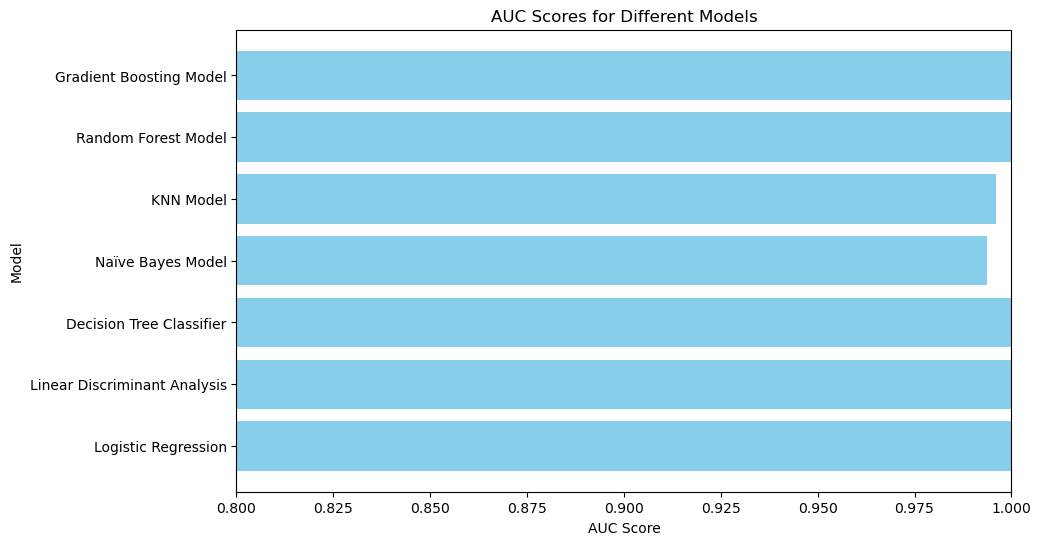

In [39]:
import matplotlib.pyplot as plt

# Lists to store model names and their corresponding AUC scores
model_names = []
auc_scores = []

# Calculate and store AUC scores for each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_prob)
    
    model_names.append(name)
    auc_scores.append(auc)

# Create a bar plot for AUC scores
plt.figure(figsize=(10, 6))
plt.barh(model_names, auc_scores, color='skyblue')
plt.xlabel('AUC Score')
plt.ylabel('Model')
plt.title('AUC Scores for Different Models')
plt.xlim(0.8, 1.0)  # You can adjust the x-axis limits if needed
plt.show()
